Para el Trabajo Final del curso “Python – Ciencia de Datos” utilicé  el dataset de "Billboard Hot-100[2000-2023] data with features" que combina todas las canciones incluidas en el Top 100 anual de Billboard entre 2000 y 2023  con sus letras completas extraídas de Genius.

In [161]:
#Importación de librerías
import pandas as pd
import numpy as np
import kagglehub
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [162]:
path = kagglehub.dataset_download("suparnabiswas/billboard-hot-1002000-2023-data-with-features")
data_df = pd.read_csv(path + "/billboard_24years_lyrics_spotify.csv")

In [163]:
data_df.head()

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,1,Breathe,Faith Hill,/wiki/Breathe_(Faith_Hill_song),Breathe,/wiki/Faith_Hill,2000,I can feel the magic floating in the air\nBein...,spotify:track:3y4LxiYMgDl4RethdzpmNe,0.529,...,0.000000,0.2510,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547.0,4.0
1,2,Smooth,Santana,/wiki/Smooth_(Santana_song),Smooth,/wiki/Santana_(band),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:0n2SEXB2qoRQg171q7XqeW,0.609,...,0.000005,0.2950,0.961,115.996,audio_features,0n2SEXB2qoRQg171q7XqeW,https://api.spotify.com/v1/tracks/0n2SEXB2qoRQ...,https://api.spotify.com/v1/audio-analysis/0n2S...,294987.0,4.0
2,2,Smooth,Rob Thomas,/wiki/Smooth_(Santana_song),Smooth,/wiki/Rob_Thomas_(musician),2000,"Man, it's a hot one\nLike seven inches from th...",spotify:track:5IALWUYK0zDSEmZgb4ICvc,0.590,...,0.807000,0.2990,0.724,115.983,audio_features,5IALWUYK0zDSEmZgb4ICvc,https://api.spotify.com/v1/tracks/5IALWUYK0zDS...,https://api.spotify.com/v1/audio-analysis/5IAL...,244924.0,4.0
3,3,Maria Maria,Santana,/wiki/Maria_Maria,Maria Maria,/wiki/Santana_(band),2000,"Ladies and gents, turn up your sound systems\n...",spotify:track:3XKIUb7HzIF1Vu9usunMzc,0.777,...,0.002010,0.0348,0.680,97.911,audio_features,3XKIUb7HzIF1Vu9usunMzc,https://api.spotify.com/v1/tracks/3XKIUb7HzIF1...,https://api.spotify.com/v1/audio-analysis/3XKI...,261973.0,4.0
4,3,Maria Maria,The Product G&B,/wiki/Maria_Maria,Maria Maria,/wiki/The_Product_G%26B,2000,Turn up this sound system\nTo the sound of Car...,spotify:track:3XKIUb7HzIF1Vu9usunMzc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
data_df.describe()

,ranking,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3397.000000,3397.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,50.102149,2011.769208,0.667459,0.685195,5.088477,-6.225352,0.592593,0.112230,0.163482,0.018879,0.169990,0.599695,116.609210,248755.316872,3.977366
std,28.725958,6.821920,0.143421,0.152945,3.460289,2.199694,0.491858,0.106911,0.181582,0.098301,0.149100,0.230685,29.657696,42266.789476,0.225905
min,1.000000,2000.000000,0.190000,0.119000,0.000000,-17.692000,0.000000,0.023600,0.000051,0.000000,0.027200,0.061200,62.876000,74080.000000,1.000000
25%,25.000000,2006.000000,0.580250,0.573500,2.000000,-7.514000,0.000000,0.036025,0.026850,0.000000,0.080175,0.429500,94.029000,222346.500000,4.000000
50%,50.000000,2012.000000,0.677000,0.695000,5.000000,-5.866000,1.000000,0.058300,0.084950,0.000000,0.113000,0.641500,106.153000,242753.000000,4.000000
75%,75.000000,2018.000000,0.772000,0.807000,8.000000,-4.753000,1.000000,0.162000,0.252750,0.000057,0.217000,0.791000,134.082750,271581.000000,4.000000
max,100.000000,2023.000000,0.956000,0.980000,11.000000,-1.299000,1.000000,0.505000,0.955000,0.925000,0.957000,0.969000,203.746000,432147.000000,5.000000


#Preprocesamiento de Datos

##Tratamiento de Valores Nulos

Se identificaron 17 columnas con valores nulos. Todas esas columnas corresponde a características de audio.

In [165]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ranking           3397 non-null   int64  
 1   song              3397 non-null   object 
 2   band_singer       3397 non-null   object 
 3   songurl           3397 non-null   object 
 4   titletext         3397 non-null   object 
 5   url               3397 non-null   object 
 6   year              3397 non-null   int64  
 7   lyrics            3397 non-null   object 
 8   uri               3397 non-null   object 
 9   danceability      486 non-null    float64
 10  energy            486 non-null    float64
 11  key               486 non-null    float64
 12  loudness          486 non-null    float64
 13  mode              486 non-null    float64
 14  speechiness       486 non-null    float64
 15  acousticness      486 non-null    float64
 16  instrumentalness  486 non-null    float64


In [166]:
data_df.isnull().sum()

,0
ranking,0
song,0
band_singer,0
songurl,0
titletext,0
url,0
year,0
lyrics,0
uri,0
danceability,2911


Decidí eliminar las columnas relacionadas con las características de audio. La razón principal es que, a pesar de su potencial para el análisis, la mayoría de las canciones del dataset carecen de esta información,lo que haría que cualquier análisis basado en ellas fuera impreciso. La imputación de datos sería incorrecta, dado a que se trata de valores  díficiles de estimar con certeza.

In [167]:
cols_audio_features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'type', 'id', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'
]
data_df = data_df.drop(columns=cols_audio_features)

In [168]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ranking      3397 non-null   int64 
 1   song         3397 non-null   object
 2   band_singer  3397 non-null   object
 3   songurl      3397 non-null   object
 4   titletext    3397 non-null   object
 5   url          3397 non-null   object
 6   year         3397 non-null   int64 
 7   lyrics       3397 non-null   object
 8   uri          3397 non-null   object
dtypes: int64(2), object(7)
memory usage: 239.0+ KB


In [169]:
data_df.isnull().sum()

,0
ranking,0
song,0
band_singer,0
songurl,0
titletext,0
url,0
year,0
lyrics,0
uri,0


##Tratamiento de Valores duplicados

In [170]:
print("Duplicados exactos:", data_df.duplicated().sum())

Duplicados exactos: 0


En el dataset todos los años  presentan más de 100 registros, lo cuál es un claro indicio de datos duplicados

In [171]:
data_df['year'].value_counts().sort_index()

,count
year,
2000,115
2001,125
2002,134
2003,142
2004,141
2005,140
2006,141
2007,142
2008,139


Ahora voy a revisar si en mi dataset tengo duplicados de una misma canción

In [172]:
data_df['song'].value_counts()[data_df['song'].value_counts() > 1]

,count
song,
I Like It,9
Forever,9
Beautiful,9
Stay,8
Rockstar,7
...,...
Black Beatles,2
Bodak Yellow,2
I Don't Wanna Live Forever,2


El dataset contiene canciones duplicadas debido a que las colaboraciones entre artistas se registran como registros separados. Por esta razón, una misma canción puede aparecer varias veces en el mismo año, pero con diferentes artistas.

Una misma canción puede aparecer en años distintos, lo cual es correcto, ya que la lista Billboard clasifica las canciones más populares del año sin importar cuándo fueron lanzadas, permitiendo que una canción se mantenga en el ranking durante varios años.

In [173]:
data_df[data_df['song'] == 'I Like It']

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri
104,91,I Like It,Sammie,/wiki/I_Like_It_(Sammie_song),I Like It,/wiki/Sammie,2000,"Yeah\n\nGirl, I wish that I could spend time w...",spotify:track:0IvTGWbNnCiUi9IOF7ye3F
1366,12,I Like It,Enrique Iglesias,/wiki/I_Like_It_(Enrique_Iglesias_song),I Like It,/wiki/Enrique_Iglesias,2010,"Wooo\nOne love, one love\nEnrique Iglesias, ha...",spotify:track:4nVyHATevhl5RC6Qmoko5H
1367,12,I Like It,Pitbull,/wiki/I_Like_It_(Enrique_Iglesias_song),I Like It,/wiki/Pitbull_(rapper),2010,"Wooo\nOne love, one love\nEnrique Iglesias, ha...",spotify:track:4nVyHATevhl5RC6Qmoko5H
2528,7,I Like It,Cardi B,"/wiki/I_Like_It_(Cardi_B,_Bad_Bunny_and_J_Balv...",I Like It,/wiki/Cardi_B,2018,"Yeah, baby, I like it like that\nYou gotta bel...",spotify:track:58q2HKrzhC3ozto2nDdN4z
2529,7,I Like It,Bad Bunny,"/wiki/I_Like_It_(Cardi_B,_Bad_Bunny_and_J_Balv...",I Like It,/wiki/Bad_Bunny,2018,"Yeah, baby, I like it like that\nYou gotta bel...",spotify:track:58q2HKrzhC3ozto2nDdN4z
2530,7,I Like It,J Balvin,"/wiki/I_Like_It_(Cardi_B,_Bad_Bunny_and_J_Balv...",I Like It,/wiki/J_Balvin,2018,"Yeah, baby, I like it like that\nYou gotta bel...",spotify:track:58q2HKrzhC3ozto2nDdN4z
2779,69,I Like It,Cardi B,"/wiki/I_Like_It_(Cardi_B,_Bad_Bunny_and_J_Balv...",I Like It,/wiki/Cardi_B,2019,"Yeah, baby, I like it like that\nYou gotta bel...",spotify:track:58q2HKrzhC3ozto2nDdN4z
2780,69,I Like It,Bad Bunny,"/wiki/I_Like_It_(Cardi_B,_Bad_Bunny_and_J_Balv...",I Like It,/wiki/Bad_Bunny,2019,"Yeah, baby, I like it like that\nYou gotta bel...",spotify:track:58q2HKrzhC3ozto2nDdN4z
2781,69,I Like It,J Balvin,"/wiki/I_Like_It_(Cardi_B,_Bad_Bunny_and_J_Balv...",I Like It,/wiki/J_Balvin,2019,"Yeah, baby, I like it like that\nYou gotta bel...",spotify:track:58q2HKrzhC3ozto2nDdN4z


In [174]:
data_df[data_df['song'] == 'Forever']

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri
1093,10,Forever,Chris Brown,/wiki/Forever_(Chris_Brown_song),Forever,/wiki/Chris_Brown,2008,"One, two, three, four\nHey, hey (Forever)\nHey...",spotify:track:3NZJlJemX3mzjf56MqC5ML
1329,88,Forever,Drake,/wiki/Forever_(Drake_song),Forever,/wiki/Drake_(musician),2009,It may not mean nothin' to y'all\nBut understa...,spotify:track:6HSqyfGnsHYw9MmIpa9zlZ
1330,88,Forever,Kanye West,/wiki/Forever_(Drake_song),Forever,/wiki/Kanye_West,2009,"Don't ever , and I've been waiting\nAnd you've...",spotify:track:5UsLjwBaTHBX4ektWIr4XX
1331,88,Forever,Lil Wayne,/wiki/Forever_(Drake_song),Forever,/wiki/Lil_Wayne,2009,Let's do it!\nForever\nAnd that I will\nYes\nG...,spotify:track:3EVzllf30zIBAtKb75bs1W
1332,88,Forever,Eminem,/wiki/Forever_(Drake_song),Forever,/wiki/Eminem,2009,"Verse 1\nUh, from her Lips to her lips\nI'm tr...",spotify:track:5UsLjwBaTHBX4ektWIr4XX
1450,71,Forever,Drake,/wiki/Forever_(Drake_song),Forever,/wiki/Drake_(rapper),2010,It may not mean nothin' to y'all\nBut understa...,spotify:track:6HSqyfGnsHYw9MmIpa9zlZ
1451,71,Forever,Kanye West,/wiki/Forever_(Drake_song),Forever,/wiki/Kanye_West,2010,"Don't ever , and I've been waiting\nAnd you've...",spotify:track:5UsLjwBaTHBX4ektWIr4XX
1452,71,Forever,Lil Wayne,/wiki/Forever_(Drake_song),Forever,/wiki/Lil_Wayne,2010,Let's do it!\nForever\nAnd that I will\nYes\nG...,spotify:track:3EVzllf30zIBAtKb75bs1W
1453,71,Forever,Eminem,/wiki/Forever_(Drake_song),Forever,/wiki/Eminem,2010,"Verse 1\nUh, from her Lips to her lips\nI'm tr...",spotify:track:5UsLjwBaTHBX4ektWIr4XX


In [175]:
print("La cantidad de duplicados es ", data_df.duplicated(subset=['ranking', 'year']).sum())

La cantidad de duplicados es  1004


Para eliminar los registros de canciones duplicadas dentro del mismo año, utilicé la columna "ranking" como identificador único. Esto se debe a que, por definición, una posición en el ranking no puede repetirse en un mismo año.

La utilización del campo "song" no es factible ya que es el nombre de la canción y puede que en un mismo año un artista diferente haya lanzado una canción con ese mismo nombre. Además, para no perder información sobre los colaboradores, concatené sus nombres en la columna "band_singer".

In [176]:
other_cols = [c for c in data_df.columns
              if c not in ['ranking', 'year', 'band_singer']]

agg_dict = {
    'band_singer': lambda x: ', '.join(dict.fromkeys(x).keys()),
    **{col: 'first' for col in other_cols}
}

df_clean = (
    data_df
    .sort_values(['year', 'ranking'])
    .groupby(['ranking', 'year'], as_index=False)  # ← Cambiar a ranking + year
    .agg(agg_dict)
    .sort_values(['year', 'ranking'])
    .reindex(columns=['ranking', 'song', 'band_singer', 'songurl', 'titletext', 'url', 'year', 'lyrics', 'uri'])
    .reset_index(drop=True)
)

In [177]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ranking      2393 non-null   int64 
 1   song         2393 non-null   object
 2   band_singer  2393 non-null   object
 3   songurl      2393 non-null   object
 4   titletext    2393 non-null   object
 5   url          2393 non-null   object
 6   year         2393 non-null   int64 
 7   lyrics       2393 non-null   object
 8   uri          2393 non-null   object
dtypes: int64(2), object(7)
memory usage: 168.4+ KB


Ahora el dataset ya no contiene canciones duplicadas dentro del mismo año.


In [178]:
print("La cantidad de duplicados es ", df_clean.duplicated(subset=['ranking', 'year']).sum())

La cantidad de duplicados es  0


In [179]:
df_clean['song'].value_counts()[df_clean['song'].value_counts() > 1]

,count
song,
I Like It,4
Stay,4
Dynamite,4
Rockstar,4
All I Want for Christmas Is You,4
...,...
"Hold On, We're Going Home",2
Daylight,2
Blurred Lines,2


In [180]:
df_clean[df_clean['song'] == 'Stay']

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri
1308,13,Stay,"Rihanna, Mikky Ekko",/wiki/Stay_(Rihanna_song),Stay,/wiki/Rihanna,2013,"All along, it was a fever\nA cold sweat, hot-h...",spotify:track:1dEy9Pl81QopSxNsPxXQxv
1711,17,Stay,"Zedd, Alessia Cara",/wiki/Stay_(Zedd_and_Alessia_Cara_song),Stay,/wiki/Zedd,2017,Waiting for the time to pass you by\nHope the ...,spotify:track:6uBhi9gBXWjanegOb2Phh0
2105,12,Stay,"The Kid Laroi, Justin Bieber",/wiki/Stay_(The_Kid_Laroi_and_Justin_Bieber_song),Stay,/wiki/The_Kid_Laroi,2021,I do the same thing I told you that I never wo...,spotify:track:567e29TDzLwZwfDuEpGTwo
2196,3,Stay,"The Kid Laroi, Justin Bieber",/wiki/Stay_(The_Kid_Laroi_and_Justin_Bieber_song),Stay,/wiki/The_Kid_Laroi,2022,I do the same thing I told you that I never wo...,spotify:track:567e29TDzLwZwfDuEpGTwo


In [181]:
df_clean[df_clean['song'] == 'I Like It']

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri
90,91,I Like It,Sammie,/wiki/I_Like_It_(Sammie_song),I Like It,/wiki/Sammie,2000,"Yeah\n\nGirl, I wish that I could spend time w...",spotify:track:0IvTGWbNnCiUi9IOF7ye3F
1008,12,I Like It,"Enrique Iglesias, Pitbull",/wiki/I_Like_It_(Enrique_Iglesias_song),I Like It,/wiki/Enrique_Iglesias,2010,"Wooo\nOne love, one love\nEnrique Iglesias, ha...",spotify:track:4nVyHATevhl5RC6Qmoko5H
1801,7,I Like It,"Cardi B, Bad Bunny, J Balvin","/wiki/I_Like_It_(Cardi_B,_Bad_Bunny_and_J_Balv...",I Like It,/wiki/Cardi_B,2018,"Yeah, baby, I like it like that\nYou gotta bel...",spotify:track:58q2HKrzhC3ozto2nDdN4z
1963,69,I Like It,"Cardi B, Bad Bunny, J Balvin","/wiki/I_Like_It_(Cardi_B,_Bad_Bunny_and_J_Balv...",I Like It,/wiki/Cardi_B,2019,"Yeah, baby, I like it like that\nYou gotta bel...",spotify:track:58q2HKrzhC3ozto2nDdN4z


In [182]:
df_clean[df_clean['song'] == 'Forever']

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri
806,10,Forever,Chris Brown,/wiki/Forever_(Chris_Brown_song),Forever,/wiki/Chris_Brown,2008,"One, two, three, four\nHey, hey (Forever)\nHey...",spotify:track:3NZJlJemX3mzjf56MqC5ML
984,88,Forever,"Drake, Kanye West, Lil Wayne, Eminem",/wiki/Forever_(Drake_song),Forever,/wiki/Drake_(musician),2009,It may not mean nothin' to y'all\nBut understa...,spotify:track:6HSqyfGnsHYw9MmIpa9zlZ
1067,71,Forever,"Drake, Kanye West, Lil Wayne, Eminem",/wiki/Forever_(Drake_song),Forever,/wiki/Drake_(rapper),2010,It may not mean nothin' to y'all\nBut understa...,spotify:track:6HSqyfGnsHYw9MmIpa9zlZ


Ahora la cantidad de registros por año no superan los 100, demostrando que la eliminación de datos duplicados fue exitosa.

In [183]:
df_clean['year'].value_counts()

,count
year,
2000,100
2001,100
2005,100
2004,100
2007,100
2010,100
2009,100
2008,100
2021,100


##Normalización de Datos

Las únicas  variables de mi dataset que se pueden normalizar son "ranking" y "year" ya que son las únicas variables numéricas.

In [184]:
df_clean[['ranking', 'year']].describe()

,ranking,year
count,2393.000000,2393.000000
mean,50.515671,2011.501045
std,28.841074,6.921691
min,1.000000,2000.000000
25%,26.000000,2006.000000
50%,51.000000,2012.000000
75%,75.000000,2017.000000
max,100.000000,2023.000000


Para normalizar la variable "ranking" decidí usar la técnica de "MinMaxScaler". Ya que ranking tiene un rango fijo de valores que va desde el 1 al 100.

Además, me decanté por la normalización inversa con el objetivo de mejorar la interpretación de los datos. De esta forma, los rankings más altos (posiciones cercanas al 1) se mapean a valores cercanos a 1, mientras que los rankings más bajos (posiciones cercanas a 100) se aproximan a 0. Este enfoque proporciona una representación más intuitiva, donde un valor normalizado más alto indica una mejor posición en la lista.



In [185]:
df_clean['ranking_normalized'] = 1 - MinMaxScaler().fit_transform(df_clean[['ranking']])

Para normalizar la variable "year" decidí utilizar la técnica "Z-score" dado a que se trata de una variable temporal que no tiene límites fijos predefinidos.

In [186]:
df_clean['year_normalized'] = StandardScaler().fit_transform(df_clean[['year']])

In [187]:
df_clean.sample(10)

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,ranking_normalized,year_normalized
2301,9,Snooze,SZA,/wiki/Snooze_(song),Snooze,/wiki/SZA,2023,Ooh\nI think I know\n\nI'll touch that fire fo...,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,0.919192,1.661640
1234,39,Give Your Heart a Break,Demi Lovato,/wiki/Give_Your_Heart_a_Break,Give Your Heart a Break,/wiki/Demi_Lovato,2012,The day I first met you\nYou told me you'd nev...,spotify:track:3sP3c86WFjOzHHnbhhZcLA,0.616162,0.072101
711,15,Smack That,"Akon, Eminem",/wiki/Smack_That,Smack That,/wiki/Akon,2007,"Shady (Shady)\nKonvict (Konvict), Upfront (Upf...",spotify:track:2kQuhkFX7uSVepCD3h29g5,0.858586,-0.650417
945,49,Turnin Me On,"Keri Hilson, Lil Wayne",/wiki/Turnin_Me_On,Turnin Me On,/wiki/Keri_Hilson,2009,"Yeah\nLike this\nWhere you at, shawty?\n\nYou ...",spotify:track:1jEtDqwYCKpR0mlrMrrITx,0.515152,-0.361410
1483,89,Believe Me,"Lil Wayne, Drake",/wiki/Believe_Me_(Lil_Wayne_song),Believe Me,/wiki/Lil_Wayne,2014,\nI'm the only one that get the job done\nI do...,spotify:track:6t2eIONH4Sax3R21QWiKNp,0.111111,0.361108
572,75,Beautiful Soul,Jesse McCartney,/wiki/Beautiful_Soul_(song),Beautiful Soul,/wiki/Jesse_McCartney,2005,I don't want another pretty face\nI don't want...,spotify:track:1HwpWwa6bnqqRhK8agG4RS,0.252525,-0.939424
368,70,She Hates Me,Puddle of Mudd,/wiki/She_Hates_Me,She Hates Me,/wiki/Puddle_of_Mudd,2003,"Met a girl, thought she was grand\nFell in lov...",spotify:track:16DhvbuyvJob4Q9GHNYu2n,0.303030,-1.228431
1128,33,Blow,Kesha,/wiki/Blow_(Kesha_song),Blow,/wiki/Kesha,2011,"Haha\nDance\n\nBack door cracked, we don't nee...",spotify:track:3pYDZTJM2tVBUhIRifWVzI,0.676768,-0.072403
128,29,Butterfly,Crazy Town,/wiki/Butterfly_(Crazy_Town_song),Butterfly,/wiki/Crazy_Town,2001,"Come my lady, come-come my lady\nYou're my but...",spotify:track:4BggEwLhGfrbrl7JBhC8EC,0.717172,-1.517438
1957,63,Beer Never Broke My Heart,Luke Combs,/wiki/Beer_Never_Broke_My_Heart,Beer Never Broke My Heart,/wiki/Luke_Combs,2019,I've had a largemouth bass bust my line\nA cou...,spotify:track:7aEtlGHoiPAfRB084NiDmx,0.373737,1.083626


##Tratamiento de Variables Redundantes

In [188]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ranking             2393 non-null   int64  
 1   song                2393 non-null   object 
 2   band_singer         2393 non-null   object 
 3   songurl             2393 non-null   object 
 4   titletext           2393 non-null   object 
 5   url                 2393 non-null   object 
 6   year                2393 non-null   int64  
 7   lyrics              2393 non-null   object 
 8   uri                 2393 non-null   object 
 9   ranking_normalized  2393 non-null   float64
 10  year_normalized     2393 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 205.8+ KB


Decidí eliminar "songurl", "titletext", "url" y "uri" porque solo son identificadores o URLs externas que duplican información presente en song y band_singer. Mantenerlas solo aumentaría la dimensión del dataset sin añadir valor estadístico, así que por esa razón las descarto y dejo solo las variables que realmente serán de utilidad para la realización de análisis y modelos.

In [189]:
df_clean.drop(['songurl', 'titletext', 'url', 'uri'], axis=1, inplace=True)

In [190]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ranking             2393 non-null   int64  
 1   song                2393 non-null   object 
 2   band_singer         2393 non-null   object 
 3   year                2393 non-null   int64  
 4   lyrics              2393 non-null   object 
 5   ranking_normalized  2393 non-null   float64
 6   year_normalized     2393 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 131.0+ KB


#Visualización de Datos

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style="whitegrid")


##Evolución del ranking promedio de Taylor Swift (2010–2023)

El presente gráfico muestra la evolución del ranking promedio de Taylor Swift de 2010 a 2023. Se puede observar que en su trayectoria se han presentado varios  picos de éxito, siendo el más notable en 2014 con un ranking cercano a 10, y periodos de menor popularidad, como en 2011, 2016 y 2022, donde su ranking promedio descendió notablemente. Sin embargo, en 2023 volvió a despuntar, acercándose a los niveles de su mejor año.

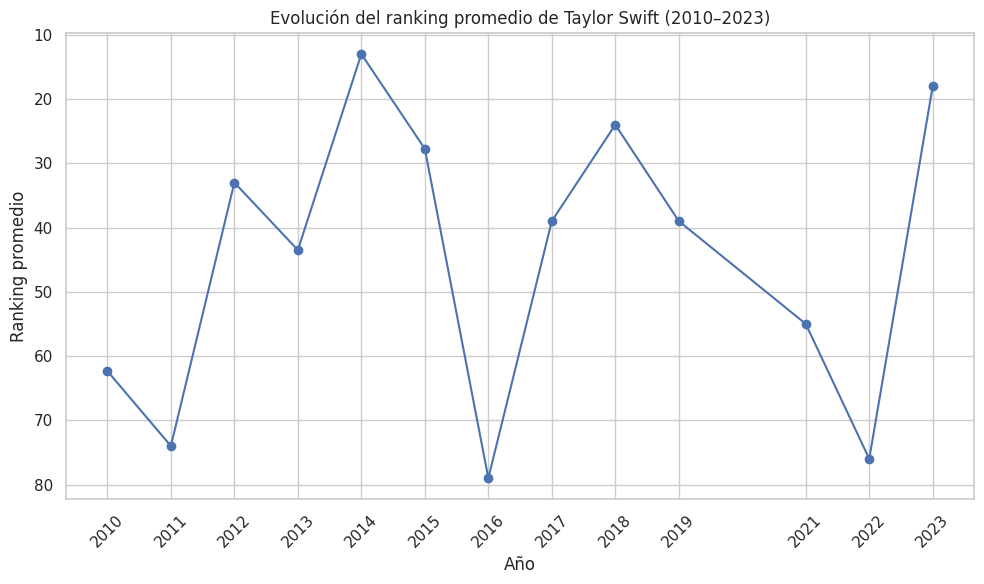

In [193]:
ts = df_clean.loc[
    (df_clean['band_singer'] == 'Taylor Swift') &
    (df_clean['year'] >= 2010),
    ['year', 'ranking']
]
ts_yearly = ts.groupby('year')['ranking'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(ts_yearly['year'], ts_yearly['ranking'], marker='o')
plt.gca().invert_yaxis()
plt.title('Evolución del ranking promedio de Taylor Swift (2010–2023)')
plt.xlabel('Año')
plt.ylabel('Ranking promedio')
plt.xticks(ts_yearly['year'], rotation=45)
plt.tight_layout()
plt.show()

##Top 5 artistas por década

El siguiente gráfico de barras muestra una alta rotación en los rankigns de popularidad, ya que los artistas más exitosos de una década no se mantienen en el top 5 de la siguiente. En la década de 2000-2009, artistas como Kelly Clarkson y P!nk dominaron las listas. Esto cambió  en la década de 2010-2019, donde Drake y Taylor Swift se convirtieron en los artistas con más apariciones. Finalmente, en el período de 2020 a 2023, una nueva generación de artistas, encabezada por Morgan Wallen emergió, confirmando que los rankigs de éxito en las listas Billboard están en constante cambio.

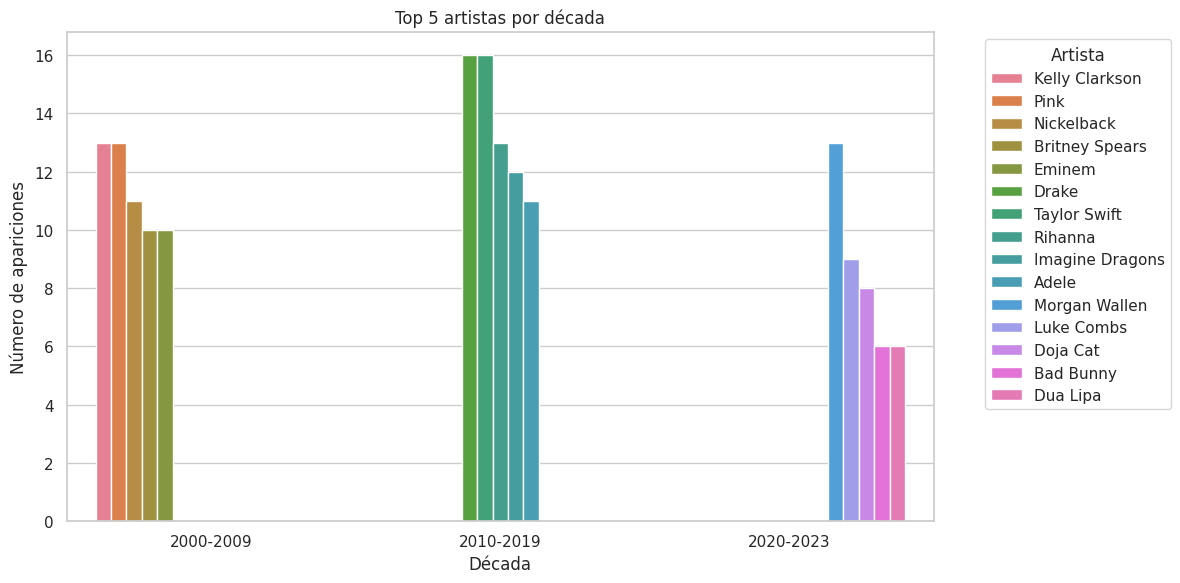

In [194]:
decades = pd.cut(
    df_clean['year'],
    bins=[1999, 2009, 2019, 2023],
    labels=['2000-2009', '2010-2019', '2020-2023']
)
counts = df_clean.assign(decade=decades).groupby(['decade', 'band_singer']).size().reset_index(name='count')

top5 = counts.groupby('decade', as_index=False).apply(lambda grp: grp.nlargest(5, 'count')).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top5, x='decade', y='count', hue='band_singer')
plt.title('Top 5 artistas por década')
plt.xlabel('Década')
plt.ylabel('Número de apariciones')
plt.legend(title='Artista', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Presencia anual de los 10 artistas más frecuentes

El siguiente gráfico de burbujas muestra la presencia a lo largo del tiempo de los 10 artistas más frecuentes de las listas Billboard. En este gráfico se aprecian picos de popularidad en años concretos para artistas como P!nk y Drake, y la longevidad de otros como Taylor Swift y Rihanna, que han mantenido una presencia constante durante más de una década. También se aprecia la evolución de la industria, con Britney Spears y The Black Eyed Peas dominando los primeros años y el surgimiento reciente de Morgan Wallen, cuya gran burbuja en los últimos años demuestra su impacto en la música actual.

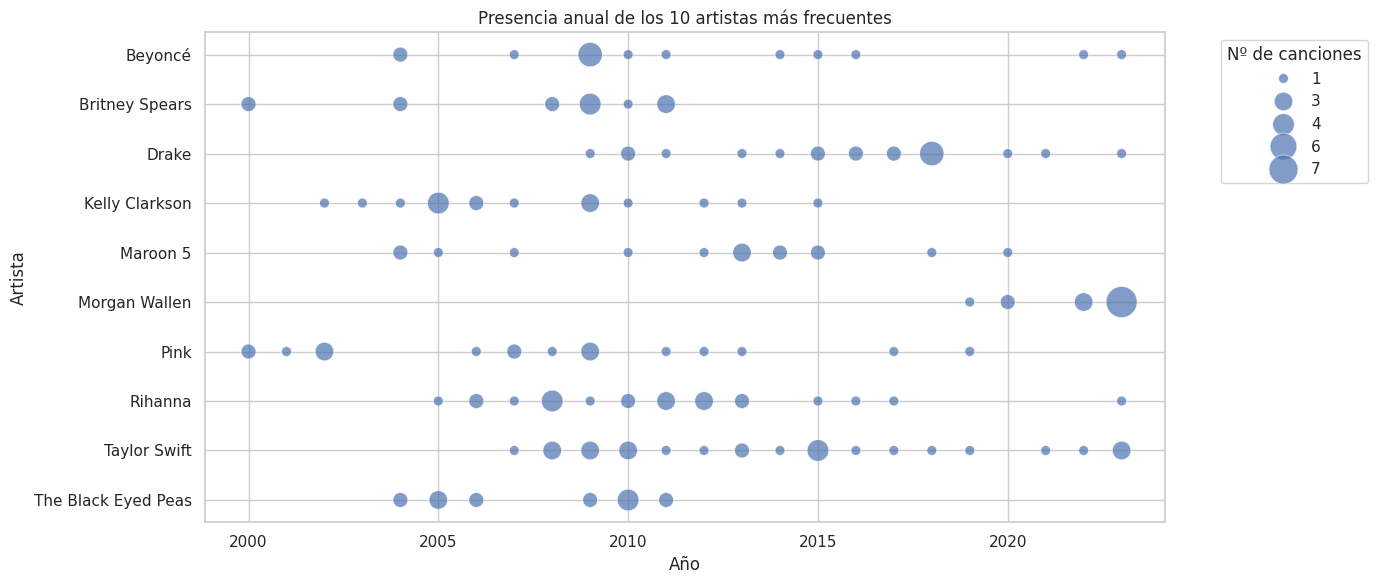

In [203]:

counts = (
    df_clean
    .groupby(['band_singer','year'])
    .size()
    .reset_index(name='count')
)

top10 = df_clean['band_singer'].value_counts().nlargest(10).index
counts_top10 = counts[counts['band_singer'].isin(top10)]

plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=counts_top10,
    x='year',
    y='band_singer',
    size='count',
    sizes=(50, 500),
    alpha=0.7,
    legend='brief'
)
plt.title('Presencia anual de los 10 artistas más frecuentes')
plt.xlabel('Año')
plt.ylabel('Artista')
plt.legend(title='Nº de canciones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##Evolución de la longitud de las letras de canciones en el TOP 100 de Billboard (2000-2023)

El presente gráfico muestra la evolución de la cantidad de palabras por canción a lo largo del tiempo, de 2000 a 2023. Se observa una tendencia general a la baja en la longitud de las letras a lo largo de las décadas. Si bien los años 2000 y 2007 las letras de las canciones presentaron una mayor variabilidad y mediana alta (por encima de 500 palabras), a partir de 2010 se puede ver que la mediana y la distribución general se contraen, manteniéndose en un rango más bajo y estable. Esto sugiere que las canciones más populares de los últimos años tienden a tener letras más cortas, con menor dispersión en el número de palabras.

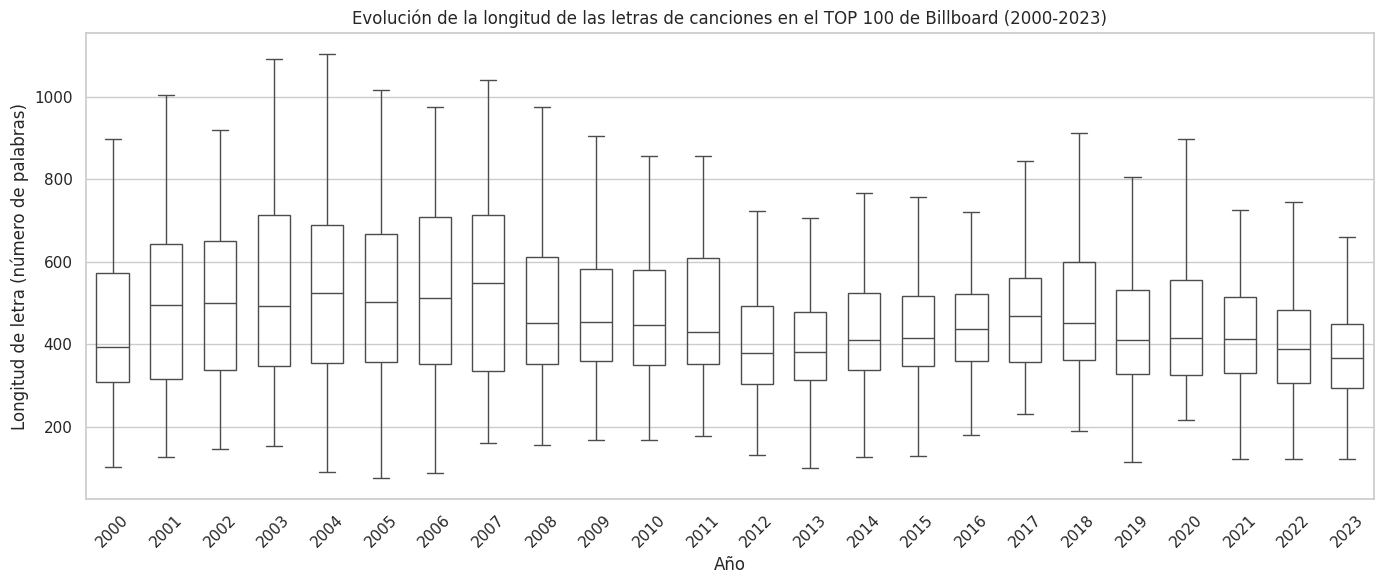

In [199]:
lyric_lengths = df_clean['lyrics'].str.split().apply(len)
df_box = pd.DataFrame({
    'year': df_clean['year'],
    'lyric_length': lyric_lengths
})

plt.figure(figsize=(14, 6))
sns.boxplot(
    x='year',
    y='lyric_length',
    data=df_box,
    width=0.6,
    showcaps=True,
    boxprops={'facecolor':'None'},
    showfliers=False,
    whiskerprops={'linewidth':1.0}
)
plt.title('Evolución de la longitud de las letras de canciones en el TOP 100 de Billboard (2000-2023)')
plt.xlabel('Año')
plt.ylabel('Longitud de letra (número de palabras)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Top 20 canciones con mayor longevidad en el Billboard Hot-100 (2000-2023)

El presente gráfico de puntos muestra las canciones que más años han permanecido en la lista. Se observa que la mayoría de las canciones del top 20 tuvieron una longevidad de tres años. Sin embargo, destacan por su notable permanencia "All I Want for Christmas Is You" y "I Like It", las cuales lideran la lista con un récord de cuatro años en el ranking. Esto demuestra que la longevidad de las canciones, incluso las más exitosas, es relativamente corta.

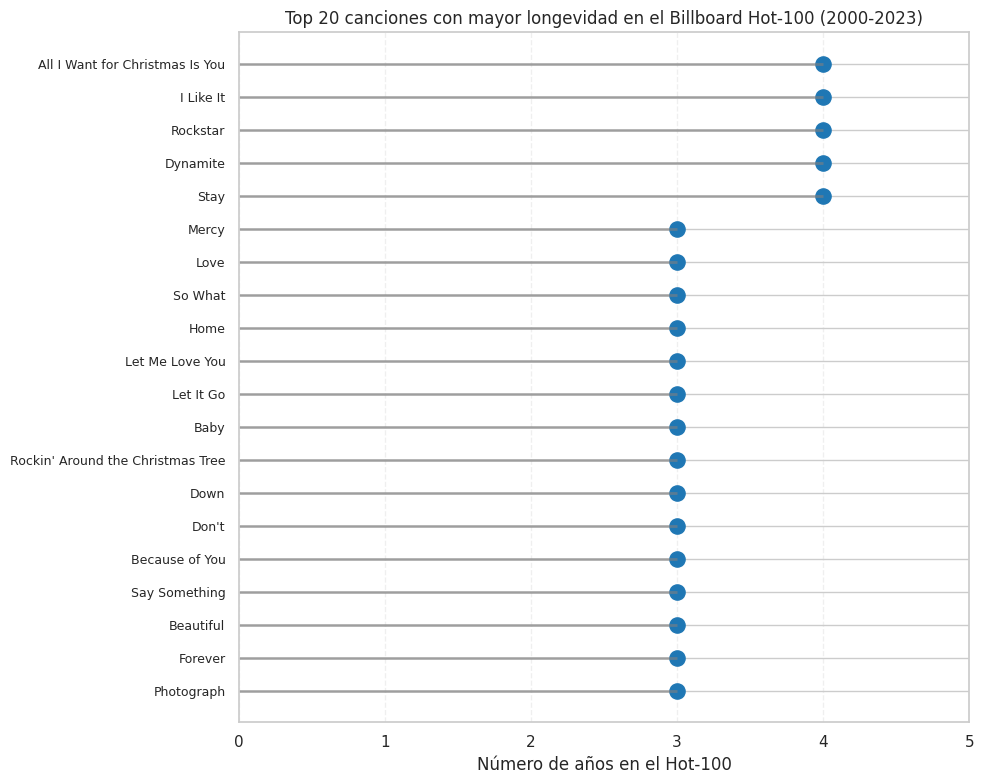

In [210]:
song_years = (
    df_clean.groupby('song')['year']
            .nunique()
            .sort_values(ascending=False)
            .head(20)
            .sort_values()
)

plt.figure(figsize=(10, 8))
y = range(len(song_years))

plt.hlines(y=y, xmin=0, xmax=song_years.values, color='gray', linewidth=2, alpha=0.6)
plt.scatter(song_years.values, y, s=120, color=sns.color_palette('tab10', 1)[0])

plt.yticks(y, song_years.index, fontsize=9)
plt.xlabel('Número de años en el Hot-100')
plt.title('Top 20 canciones con mayor longevidad en el Billboard Hot-100 (2000-2023)')
plt.xlim(0, song_years.max() + 1)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()